In [1]:
import pandas as pd
import numpy as np

**LOADING DATA**

The data stored is in the .json format and we have to convert into a suitable dataframe.

In [2]:
import json
a = 'C:/Users/Ankita/Downloads/data.json'


f = open (a, "r") 
  
# Reading from file 
data = json.loads(f.read()) 

In [3]:
df1 = pd.json_normalize(data)

In [4]:
df1.columns = df1.columns.map(lambda x: x.split(".")[-1])


In [5]:
df1

,isSafe,baseUrl,title,desc,fresh,host,user-agent,content-type,org_id,user_session_id,...,hostname,ip,ips,originalUrl,path,protocol,secure,stale,subdomains,xhr
0,True,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
1,True,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
2,False,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
3,True,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
4,False,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,/crm/note,Bridget Elliott,Recently crime before five thought bit. Card f...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
996,False,/crm/note,James Rocha,"<img src=1 href=1 onerror=""javascript:alert(1)...",False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
997,True,/crm/note,Jasmine Gibson,Set nature they then low resource truth. Edge ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
998,True,/crm/note,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False


In [6]:
df1.isnull().sum()

isSafe             0
baseUrl            0
title              0
desc               0
fresh              0
host               0
user-agent         0
content-type       0
org_id             0
user_session_id    0
accept             0
content-length     0
name               0
role               0
hostname           0
ip                 0
ips                0
originalUrl        0
path               0
protocol           0
secure             0
stale              0
subdomains         0
xhr                0
dtype: int64

In [7]:
df = pd.DataFrame(df1, columns=['title','desc','isSafe'])
df.head()

,title,desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True
1,Clayton Cooper,As possible American many prepare four strong....,True
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False
3,Laura Fisher,State third represent energy campaign not forg...,True
4,Tyler Santos,Us enjoy since. Time identify image position o...,False


**DATA PRE-PROCESSING & ANALYSIS**

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['isSafe'])
df['y'] = le.transform(df['isSafe'])

In [9]:
df

,title,desc,isSafe,y
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True,1
1,Clayton Cooper,As possible American many prepare four strong....,True,1
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,0
3,Laura Fisher,State third represent energy campaign not forg...,True,1
4,Tyler Santos,Us enjoy since. Time identify image position o...,False,0
...,...,...,...,...
995,Bridget Elliott,Recently crime before five thought bit. Card f...,True,1
996,James Rocha,"<img src=1 href=1 onerror=""javascript:alert(1)...",False,0
997,Jasmine Gibson,Set nature they then low resource truth. Edge ...,True,1
998,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,True,1


<AxesSubplot:xlabel='isSafe', ylabel='count'>

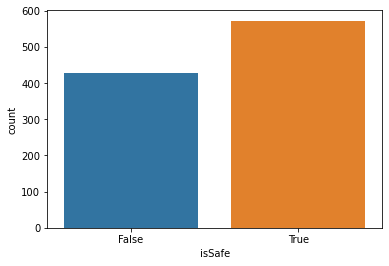

In [10]:
import seaborn as sns
sns.countplot(x='isSafe',data=df)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


stop_words = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

In [12]:
str=[]
for sent in (df['desc']):
    filtered_sentence=[]
#print(sent);
    for w in sent.split():
        

        if(w.lower() not in stop_words):
            s=w.lower().encode('utf8')
            filtered_sentence.append(s)
    str1 = b" ".join(filtered_sentence) 

    str.append(str1)
df['c_desc']=str #adding a column of CleanedText 
df['c_desc']=df['c_desc'].str.decode("utf-8")

In [13]:
df

,title,desc,isSafe,y,c_desc
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True,1,top recognize eat. fact spend area thing mater...
1,Clayton Cooper,As possible American many prepare four strong....,True,1,possible american many prepare four strong. vi...
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,0,tuesday notes 2 like 2 xsp class
3,Laura Fisher,State third represent energy campaign not forg...,True,1,state third represent energy campaign forget t...
4,Tyler Santos,Us enjoy since. Time identify image position o...,False,0,us enjoy since. time identify image position o...
...,...,...,...,...,...
995,Bridget Elliott,Recently crime before five thought bit. Card f...,True,1,recently crime five thought bit. card focus an...
996,James Rocha,"<img src=1 href=1 onerror=""javascript:alert(1)...",False,0,"<img src=1 href=1 onerror=""javascript:alert(1)..."
997,Jasmine Gibson,Set nature they then low resource truth. Edge ...,True,1,set nature low resource truth. edge recent med...
998,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,True,1,push case face suffer. letter middle term each...


**TRAIN TEST SPLIT**

In [14]:
from sklearn.model_selection import train_test_split

# split dataset into training and validation set
Xtrain, Xtest, ytrain, ytest = train_test_split(df['c_desc'], df['y'], test_size=0.2, random_state=9)

**FEATURE ENGINEERING**

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# create TF-IDF features
Xtrain_tfidf = tfidf_vectorizer.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vectorizer.transform(Xtest)

In [16]:
print(Xtrain.shape)
print(ytrain.shape)

(800,)
(800,)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

nb = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(Xtrain, ytrain)

from sklearn.metrics import classification_report
y_pred = nb.predict(Xtest)

from sklearn.metrics import accuracy_score
print('accuracy %s' % accuracy_score(y_pred, ytest))

accuracy 0.82


In [18]:
print("classifier accuracy is {:.2f}%".format(accuracy_score(y_pred, ytest) * 100))

classifier accuracy is 82.00%


In [19]:
y = le.inverse_transform(y_pred)

print(y[0:5])

[False  True False  True False]


# MODEL PREDICTION USING DEEP LEARNING

In [20]:
# split dataset into training and validation set
X_train, X_test, y_train, y_test = train_test_split(df['c_desc'], df['y'], test_size=0.2, random_state=9)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Vectorization
bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

In [22]:
tfidf = TfidfTransformer()

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

X_train=X_train.toarray()
X_test=X_test.toarray()

**BUILDING THE MODEL**


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [24]:
X_train.shape

(800, 997)

In [25]:
model = Sequential()
model.add(Dense(units=997,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=450,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=300,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
25/25 [==============================] - 1s 27ms/step - loss: 0.6562 - accuracy: 0.5962 - val_loss: 0.5974 - val_accuracy: 0.7600
Epoch 2/40
25/25 [==============================] - 0s 18ms/step - loss: 0.4875 - accuracy: 0.8075 - val_loss: 0.4679 - val_accuracy: 0.8200
Epoch 3/40
25/25 [==============================] - 0s 18ms/step - loss: 0.2215 - accuracy: 0.9125 - val_loss: 0.6928 - val_accuracy: 0.7250
Epoch 4/40
25/25 [==============================] - 0s 18ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 1.3297 - val_accuracy: 0.7850
Epoch 5/40
25/25 [==============================] - 0s 18ms/step - loss: 0.0241 - accuracy: 0.9937 - val_loss: 1.3883 - val_accuracy: 0.7650
Epoch 6/40
25/25 [==============================] - 0s 19ms/step - loss: 0.0165 - accuracy: 0.9937 - val_loss: 1.3309 - val_accuracy: 0.7450
Epoch 7/40
25/25 [==============================] - 1s 20ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.5270 - val_accuracy: 0.7600
Epoch 8/40
25

**EVALUATION**

In [28]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[60 33]
 [14 93]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        93
           1       0.74      0.87      0.80       107

   micro avg       0.77      0.77      0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [30]:
y_preds = le.inverse_transform(predictions)
y_tests = le.inverse_transform(y_test)
print(y_preds[0:5])
print(y_tests[0:5])

[False  True False  True False]
[False  True False  True False]


c:\users\ankita\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
